## Import Data

In [ ]:
pip install scikit-plot

In [ ]:
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import scikitplot as scplt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
#from sklearn import metrics, cross_validation
#from sklearn.cross_validation import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
#from sklearn.datasets import load_digits
#from sklearn.decomposition import PCA
#from collections import Counter
#import seaborn as sns  # pretty plotting, including heat map
   
np.set_printoptions(precision=3)

In [ ]:
# import data
df = pd.read_csv('/content/drive/MyDrive/diabetes_data.csv')

## Data Preprocessing

In [ ]:
# You should combine the < 30 days and > 30 days values to “Yes”.
# you need to ensure that categorical variables are represented with (k-1) dummy variables that have values 0 or 1.
df = df.replace({'readmitted': '>30'}, {'readmitted': 'YES'})
df = df.replace({'readmitted': '<30'}, {'readmitted': 'YES'})
df['readmitted'].value_counts()

NO     52338
YES    45715
Name: readmitted, dtype: int64

In [ ]:
# Numerical data:
numerical_cols = ['time_in_hospital',	'num_lab_procedures',	'num_procedures',	
                  'num_medications',	'number_outpatient',	'number_emergency',	
                  'number_inpatient',	'number_diagnoses']

In [ ]:
# race	gender	age	 admission_type_id	discharge_disposition_id	
# admission_source_id		max_glu_serum	A1Cresult	
# metformin	repaglinide	nateglinide	chlorpropamide	glimepiride	acetohexamide	glipizide	
# glyburide	tolbutamide	pioglitazone	rosiglitazone	acarbose	miglitol	troglitazone	tolazamide	insulin	
# glyburide-metformin	glipizide-metformin	glimepiride-pioglitazone	metformin-pioglitazone
# change	diabetesMed	

# Categorical data:
category_cols = ['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 
                 'admission_source_id', 'max_glu_serum', 'A1Cresult', 'metformin',	
                 'repaglinide',	'nateglinide',	'chlorpropamide',	'glimepiride',	
                 'acetohexamide',	'glipizide', 'glyburide',	'tolbutamide',	'pioglitazone',
                 'rosiglitazone',	'acarbose',	'miglitol',	'troglitazone',	'tolazamide',	
                 'insulin', 'glyburide-metformin',	'glipizide-metformin',	'glimepiride-pioglitazone',
                 'metformin-pioglitazone', 'change',	'diabetesMed']

# encounter_id and patient_nbr: these are just identifiers and not useful variables
# diag1, diag2, diag3 — are categorical and have a lot of values. We will use number_diagnoses to capture some of this information.

### Get all dummies

**Get dummy variables (k-1 columns) for categorical variables.**

In [ ]:
term_adm_type = pd.get_dummies(df['admission_type_id'], prefix='adm_type_id', drop_first=True)
term_dis_dispo = pd.get_dummies(df['discharge_disposition_id'], prefix='disch_dispo_id', drop_first=True)
term_adm_source = pd.get_dummies(df['admission_source_id'], prefix='adm_source_id', drop_first=True)

ids = term_adm_type.join(term_dis_dispo)
ids = ids.join(term_adm_source)

In [ ]:
# Get dummies for all categorical data
cat_data = pd.get_dummies(df[category_cols], drop_first=True).drop(columns=['admission_type_id', 'discharge_disposition_id', 'admission_source_id'])
cat_data = ids.join(cat_data)

In [ ]:
# Use the "Readmitted" variable as the dependent variable.
final_X = df[numerical_cols].join(cat_data)
y = df['readmitted']

In [ ]:
final_X

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,adm_type_id_2,adm_type_id_3,...,insulin_Steady,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes
0,3,59,0,18,0,0,0,9,0,0,...,0,1,1,0,0,0,0,0,0,1
1,2,11,5,13,2,0,1,6,0,0,...,0,0,1,0,0,0,0,0,1,1
2,2,44,1,16,0,0,0,7,0,0,...,0,1,1,0,0,0,0,0,0,1
3,1,51,0,8,0,0,0,5,0,0,...,1,0,1,0,0,0,0,0,0,1
4,3,31,6,16,0,0,0,9,1,0,...,1,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98048,3,51,0,16,0,0,0,9,0,0,...,0,0,1,0,0,0,0,0,0,1
98049,5,33,3,18,0,0,1,9,0,0,...,1,0,1,0,0,0,0,0,1,1
98050,1,53,0,9,1,0,0,13,0,0,...,0,0,1,0,0,0,0,0,0,1
98051,10,45,2,21,0,0,1,9,1,0,...,0,1,1,0,0,0,0,0,0,1


### Feature Selection

**NOTE: Be careful with the categorical predictors. Since LDA and QDA use pooled or within-group covariance matrices, some of the dummies might give problems due to linear dependencies or taking on constant values across the groups. You may have to add predictors one at a time to assess which dummy predictor (or predictors create problems that you don’t use them in the final model).**

### Check for correlation

In [ ]:
cor = final_X.corr()

In [ ]:
col = cor.columns
for i in range(len(col)):
  colname = col[i]
  cor_tmp = abs(cor[colname])
  select_feat = cor_tmp[cor_tmp > 0.5]
  if len(select_feat) > 1:
    print(colname, ":")
    print(select_feat)
    print("--------------------------------")

adm_type_id_3 :
adm_type_id_3      1.000000
adm_source_id_7    0.502013
Name: adm_type_id_3, dtype: float64
--------------------------------
adm_type_id_5 :
adm_type_id_5         1.000000
max_glu_serum_None    0.521364
Name: adm_type_id_5, dtype: float64
--------------------------------
adm_source_id_7 :
adm_type_id_3      0.502013
adm_source_id_7    1.000000
Name: adm_source_id_7, dtype: float64
--------------------------------
adm_source_id_17 :
adm_source_id_17      1.000000
max_glu_serum_None    0.622517
Name: adm_source_id_17, dtype: float64
--------------------------------
max_glu_serum_None :
adm_type_id_5         0.521364
adm_source_id_17      0.622517
max_glu_serum_None    1.000000
max_glu_serum_Norm    0.687426
Name: max_glu_serum_None, dtype: float64
--------------------------------
max_glu_serum_Norm :
max_glu_serum_None    0.687426
max_glu_serum_Norm    1.000000
Name: max_glu_serum_Norm, dtype: float64
--------------------------------
A1Cresult_>8 :
A1Cresult_>8      1.000

**We check the correlation of each dummy variable and find some variables with high correlation coefficients. So we drop these variables and not use them in the final model.**

In [ ]:
selected_X = final_X.drop(columns=['adm_type_id_3', 'adm_source_id_17', 'A1Cresult_None', 'max_glu_serum_>300',	'max_glu_serum_None', 'max_glu_serum_Norm', 'A1Cresult_>8', 
                                   'metformin_No', 'repaglinide_No', 'nateglinide_No', 'chlorpropamide_No', 'glimepiride_No', 
                                   'glipizide_No', 'glyburide_No', 'pioglitazone_No', 'rosiglitazone_No', 'acarbose_No', 'miglitol_No',
                                   'insulin_No', 'glyburide-metformin_No', 'change_No', 'diabetesMed_Yes'])

In [ ]:
cor2 = selected_X.corr()
col = cor2.columns
for i in range(len(col)):
  colname = col[i]
  cor_tmp = abs(cor2[colname])
  select_feat = cor_tmp[cor_tmp > 0.5]
  if len(select_feat) > 1:
    print(colname, ":")
    print(select_feat)
    print("--------------------------------")

## Linear Discriminant Analysis

### Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, test_size=0.3, random_state=1123)

In [ ]:
X_train

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,adm_type_id_2,adm_type_id_4,...,troglitazone_Steady,tolazamide_Steady,tolazamide_Up,insulin_Steady,insulin_Up,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-pioglitazone_Steady
52256,9,56,6,38,0,0,2,9,0,0,...,0,0,0,0,0,0,0,0,0,0
53955,2,47,0,8,0,0,0,9,0,0,...,0,0,0,0,0,0,0,0,0,0
9484,6,46,2,35,0,0,1,9,0,0,...,0,0,0,0,0,0,0,0,0,0
74019,3,26,2,21,0,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
51690,11,85,2,29,0,0,0,9,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88154,1,39,3,16,3,0,0,7,0,0,...,0,0,0,0,0,0,0,0,0,0
28160,6,50,2,18,0,0,0,5,0,0,...,0,0,0,1,0,0,0,0,0,0
10528,7,77,0,12,0,0,0,9,0,0,...,0,0,0,1,0,0,0,0,0,0
22316,4,58,1,14,0,0,1,9,1,0,...,0,0,0,0,0,0,0,0,0,0


### create model

In [ ]:
LDA = LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                                 solver='svd', store_covariance=False, tol=0.0001)

The Classification table is [[12052  3644]
 [ 7269  6451]]
              precision    recall  f1-score   support

          NO       0.62      0.77      0.69     15696
         YES       0.64      0.47      0.54     13720

    accuracy                           0.63     29416
   macro avg       0.63      0.62      0.62     29416
weighted avg       0.63      0.63      0.62     29416



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


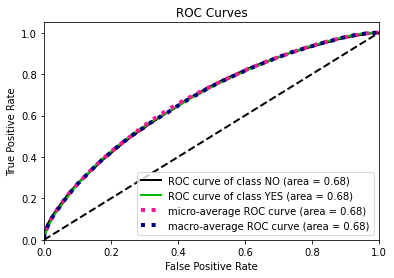

The AUC Value for the model is nan
The thresholds tried are, [1.998 0.998 0.402 0.402 0.256 0.255 0.008]


In [ ]:
### Train-test split of the data 70:30, then perform Discriminant Analysis
#on the training data, predictions on the test data
### Computing and printing the classification table

my_results_train = LDA.fit(X_train, y_train)
predictions_test = my_results_train.predict(X_test)
predictions_test_prob = my_results_train.predict_proba(X_test)

print("The Classification table is", confusion_matrix(y_test, predictions_test))
print(classification_report(y_test, predictions_test))

fpr, tpr, tholds = metrics.roc_curve(y_test, predictions_test_prob[:,1], pos_label = 1)
scplt.metrics.plot_roc(y_test, predictions_test_prob)
plt.show()

print("The AUC Value for the model is", metrics.auc(fpr, tpr))
print("The thresholds tried are,", tholds)

### Confusion Matrix for Train

In [ ]:
predictions_train = my_results_train.predict(X_train)

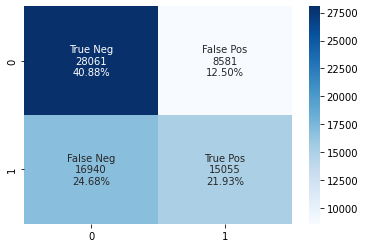

In [ ]:
cf_matrix_train = metrics.confusion_matrix(y_train, predictions_train)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_train.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_train.flatten()/np.sum(cf_matrix_train)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sb.heatmap(cf_matrix_train, annot=labels, fmt='', cmap='Blues')

### Confusion Matrix for Holdout

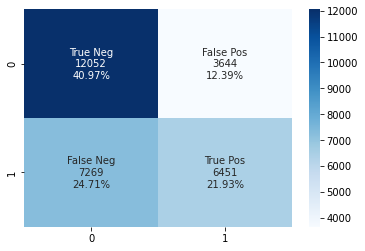

In [ ]:
cf_matrix_test = metrics.confusion_matrix(y_test, predictions_test)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_test.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_test.flatten()/np.sum(cf_matrix_test)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sb.heatmap(cf_matrix_test, annot=labels, fmt='', cmap='Blues')

## Quadratic Discriminant Analysis

### Feature selection for QDA

**QDA seems to be much more sensitive to multicollinearity. So here I check the predictors (including all dummy predictors) one by one to avoid the collinear situation.**

In [ ]:
selected_X_QDA = selected_X.iloc[:,1:12]
selected_X_QDA = selected_X_QDA.join(selected_X.iloc[:,13:23])
selected_X_QDA = selected_X_QDA.join(selected_X.iloc[:,24:31])
selected_X_QDA = selected_X_QDA.join(selected_X.iloc[:,33:37])
selected_X_QDA = selected_X_QDA.join(selected_X.iloc[:,38:48])
selected_X_QDA = selected_X_QDA.join(selected_X.iloc[:,51:53])
selected_X_QDA = selected_X_QDA.join(selected_X.iloc[:,54:59])
selected_X_QDA = selected_X_QDA.join(selected_X.iloc[:,60:80])
selected_X_QDA = selected_X_QDA.join(selected_X.iloc[:,81:93])
selected_X_QDA = selected_X_QDA.join(selected_X.iloc[:,94:96])
selected_X_QDA = selected_X_QDA.join(selected_X.iloc[:,97:102])

### Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(selected_X_QDA, y, test_size=0.3, random_state=1123)

In [ ]:
X_train

,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,adm_type_id_2,adm_type_id_4,adm_type_id_5,...,acarbose_Steady,acarbose_Up,miglitol_Steady,troglitazone_Steady,tolazamide_Steady,insulin_Steady,insulin_Up,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady
52256,56,6,38,0,0,2,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53955,47,0,8,0,0,0,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9484,46,2,35,0,0,1,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74019,26,2,21,0,0,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51690,85,2,29,0,0,0,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88154,39,3,16,3,0,0,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28160,50,2,18,0,0,0,5,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10528,77,0,12,0,0,0,9,0,0,0,...,0,0,0,0,0,1,0,0,0,0
22316,58,1,14,0,0,1,9,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Create model

The Classification table is [[ 4405 11291]
 [ 2243 11477]]
              precision    recall  f1-score   support

          NO       0.66      0.28      0.39     15696
         YES       0.50      0.84      0.63     13720

    accuracy                           0.54     29416
   macro avg       0.58      0.56      0.51     29416
weighted avg       0.59      0.54      0.50     29416



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


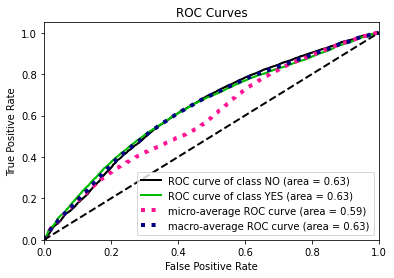

In [ ]:
### Train-test split of the data 70:30, then perform Discriminant Analysis
#on the training data, predictions on the test data
### Computing and printing the classification table
QDA = QuadraticDiscriminantAnalysis(store_covariance=False, tol=0.0001)

my_results_train_qda = QDA.fit(X_train,y_train)
predictions_test_qda = my_results_train_qda.predict(X_test)
predictions_test_prob_qda = my_results_train_qda.predict_proba(X_test)

print("The Classification table is", confusion_matrix(y_test, predictions_test_qda))
print(classification_report(y_test, predictions_test_qda))

fpr, tpr, tholds = metrics.roc_curve(y_test, predictions_test_prob_qda[:,1], pos_label = 1)
scplt.metrics.plot_roc(y_test, predictions_test_prob_qda)
plt.show()

# print("The AUC Value for the model is", metrics.auc(fpr, tpr))
# print("The thresholds tried are,", tholds)

### Confusion Matrix for Train

In [ ]:
predictions_train2 = my_results_train_qda.predict(X_train)

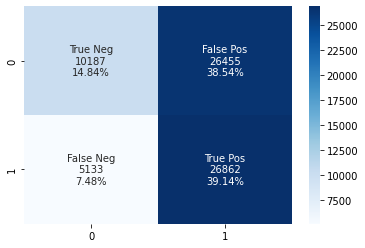

In [ ]:
cf_matrix_train2 = metrics.confusion_matrix(y_train, predictions_train2)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_train2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_train2.flatten()/np.sum(cf_matrix_train2)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sb.heatmap(cf_matrix_train2, annot=labels, fmt='', cmap='Blues')

### Confusion Matrix for Holdout

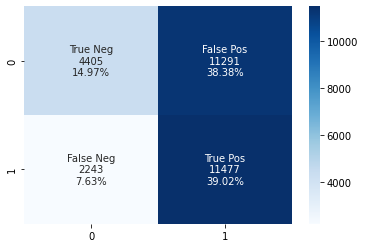

In [ ]:
cf_matrix_test2 = metrics.confusion_matrix(y_test, predictions_test_qda)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_test2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_test2.flatten()/np.sum(cf_matrix_test2)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sb.heatmap(cf_matrix_test2, annot=labels, fmt='', cmap='Blues')

## Summary

- **For both LDA and QDA, compare the confusion matrices of the training set and the holdout set. You can also calculate metrics you deem relevant, such as accuracy, precision, recall, and F-1 score.**
- **How often in train and test do LDA and QDA make the same prediction?** 

In [ ]:
count_train = 0
for i in range(len(predictions_train)):
    if predictions_train[i] == predictions_train2[i]:
        count_train += 1

count_test = 0
for i in range(len(predictions_test)):
    if predictions_test[i] == predictions_test_qda[i]:
        count_test += 1

print("Frequency of same prediction in train data: ", count_train)
print("Percentage of same prediction in train: ", round(count_train/len(predictions_train), 5))
print("Frequency of same prediction in test data: ", count_test)
print("Percentage of same prediction in test: ", round(count_test/len(predictions_test), 5))

Frequency of same prediction in train data:  36572
Percentage of same prediction in train:  0.53283
Frequency of same prediction in test data:  15615
Percentage of same prediction in test:  0.53083


**Summarize your results –for both training and Test. Which model yields the best predictions overall, and which models yielded the best predictions of "Yes"? Do you like the model? Did it predict well as you expected it to predict?**

From the above solution, both model are stable since the confusion matrices for train and test are similar.
- For LDA, the precision of "YES" and "NO" is similar. And from the confusion matrices for both train and test data, the proportion of True negative is the highest.
- QDA, on the other hand, has a higher precision of "NO" than LDA, but lower precision of "YES". And the difference in precisions is much higher than that of LDA. Also, from the confusion matrices, we could see that it has the highest proportion in True positive, but with similar proportion in False positive.
- So from the above result, it seems that LDA are more likely to make predictions of "NO" while QDA are more likely to make predictions of "YES".

\
**I would conclude that LDA performs better and make better prediction. It has an overall higher score for metrics such as accuracy, precision, recall and f1-score. Also, the precision of "YES" of LDA is higher than that of QDA, which indicated that LDA have better prediction of "YES".\
For me, I like LDA better since the prediction results seem to be more reasonable. Also, the ROC curve makes more sense. Besides, the feature selection process is easier for LDA.**